# Setup

## Colab

In [1]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [2]:

# Import importlib to reload modules and sys and os to add the path for other import
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertPreTiny

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertPreTiny)

# Import the model and funcs required from utils
from classes.models.BertPreTiny import BertPreTiny
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [3]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertPreTiny",
    "model_base": "prajjwal1/bert-tiny",
    "data_ds": "1k",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 128,
    "num_hidden_layers": 2,
    "num_attention_heads": 2,
    "intermediate_size": 512,
    # Training Parameters
    "batch_size": 3,
    "lr": 5e-5,
    "mu": 0.25,
    "epochs": 200,
    "patience": 2,
    "save_int": 50,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Processing files: 100%|██████████| 800/800 [02:29<00:00,  5.36it/s]



800(P) = 800(G) + 0(E)


Processing files: 100%|██████████| 100/100 [00:13<00:00,  7.46it/s]



100(P) = 100(G) + 0(E)


Processing files: 100%|██████████| 100/100 [00:15<00:00,  6.29it/s]



100(P) = 100(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "prajjwal1/bert-tiny",
  "model_name": "BertPreTiny",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "1k",
  "data_dir": "../data",
  "train_dir": "../data/1k_train",
  "val_dir": "../data/1k_val",
  "test_dir": "../data/1k_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 128,
  "num_hidden_layers": 2,
  "num_attention_heads": 2,
  "intermediate_size": 512,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 3,
  "lr": 5e-05,
  "mu": 0.25,
  "epochs": 200,
  "patience": 2

# Model Training

In [4]:
# Create and observe the model
untrained_model = BertPreTiny(config).to(DEVICE)
# print(untrained_model)

## Training Metrics

1. GPU Model: 539 mb
2. GPU Training: 33.8 gb

3. Per Epoch Train Time: 1m42s
4. Per Epoch Val Time: 4s


In [5]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.23it/s]


Train Loss: 1.1076e+00, Val Loss: 6.6436e-01


Epoch 1


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.23it/s]


Train Loss: 6.9885e-01, Val Loss: 4.4371e-01


Epoch 2


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.22it/s]


Train Loss: 5.6086e-01, Val Loss: 3.6706e-01


Epoch 3


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.22it/s]


Train Loss: 5.0547e-01, Val Loss: 3.3447e-01


Epoch 4


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.22it/s]


Train Loss: 4.8082e-01, Val Loss: 3.2782e-01


Epoch 5


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.22it/s]


Train Loss: 5.2019e-01, Val Loss: 3.3077e-01


Epoch 6


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.22it/s]

Train Loss: 5.2160e-01, Val Loss: 3.5268e-01


EARLY STOPPING at epoch 6, best epoch 4
Train Loss = 4.8082e-01, Val Loss = 3.2782e-01


TRAINING DONE at epoch 6, best epoch 4
Train Loss = 0.48081949199741697, Perplexity = 1.000016027444838
Val Loss = 0.3278162547332399, Perplexity = 1.0000109272681932


# Evaluation

## Single Example


Filename: ../data/1k_train/2006fair.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(39,0): 0.889351 | (45,0): 0.891293 | (63,0): 0.896934 | (23,0): 0.915006 | (28,0): 0.918298 | (16,0): 0.924660 | (0,0): 0.930354 | (6,0): 0.932591

NB to B ratio: Predicted = 9980:20 | Actual = 9992:8
Accuracy: 99.78% | Precision: 15.00% | Recall: 37.50% | F1-Score: 0.21



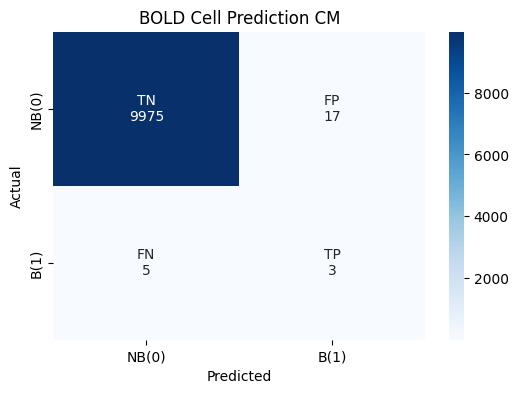


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0
0,1
2,1
3,1
6,1
8,1
9,1
11,1
12,1
13,1
14,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0
0,1
6,1
16,1
23,1
28,1
39,1
45,1
63,1


In [10]:
# Params
thresh = 0.92
train_loc = 0

# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=train_loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/1k_val/gerald_nemec_000_1_1.pst.155.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(2,4): 0.855375 | (2,3): 0.865877 | (2,0): 0.870375 | (2,2): 0.875974 | (2,1): 0.878157 | (31,6): 0.889035 | (24,6): 0.892765 | (29,6): 0.893011 | (26,6): 0.899435 | (38,0): 0.908386 | (36,0): 0.909193 | (22,6): 0.913868 | (30,0): 0.917392 | (33,0): 0.919250 | (17,6): 0.920667 | (15,6): 0.921937 | (7,6): 0.922145 | (13,6): 0.922556 | (11,6): 0.922824 | (19,6): 0.924409 | (15,0): 0.926625 | (0,0): 0.928093 | (18,0): 0.928693 | (9,6): 0.931581 | (0,1): 0.933212 | (1,0): 0.933395 | (1,1): 0.936570 | (2,6): 0.937061 | (0,2): 0.937171 | (2,9): 0.938002 | (0,9): 0.938166 | (2,7): 0.938330 | (0,8): 0.938424 | (0,7): 0.938445 | (1,2): 0.938490 | (2,8): 0.938702 | (0,6): 0.938732 | (0,3): 0.939237 | (6,0): 0.939327 | (1,3): 0.939336 | (1,4): 0.939521 | (0,4): 0.939818 | (1,9): 0.941503 | (1,8): 0.942652 | (1,6): 0.942747 | (1,7): 0.943028

NB to B ratio: Predicted = 9958:42 | Actual =

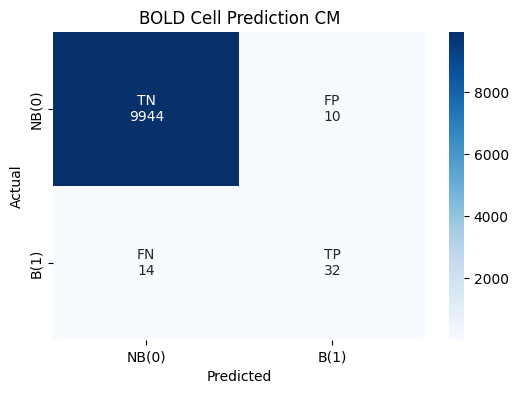


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,6,7,8,9
0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,1,1,1,1
6,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0
9,0,1,0,0,0,1,0,0,0
11,0,1,0,0,0,1,0,0,0
13,0,1,0,0,0,1,0,0,0
15,1,0,0,0,0,1,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,6,7,8,9
0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
6,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,1,0,0,0
13,0,0,0,0,0,1,0,0,0
15,1,0,0,0,0,1,0,0,0
17,0,0,0,0,0,1,0,0,0


In [23]:
val_loc = 87

# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=val_loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/1k_test/02origdi.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(30,14): 0.103446 | (34,5): 0.104329 | (46,15): 0.104337 | (34,6): 0.105392 | (97,5): 0.110511 | (26,15): 0.110932 | (32,15): 0.111055 | (46,5): 0.113864 | (40,15): 0.114503 | (38,5): 0.116232 | (30,6): 0.116414 | (75,15): 0.117243 | (44,6): 0.117594 | (93,14): 0.119283 | (67,14): 0.119346 | (26,14): 0.119416 | (28,15): 0.120076 | (42,12): 0.121010 | (46,14): 0.123511 | (36,5): 0.124534 | (32,6): 0.128575 | (42,5): 0.128984 | (44,14): 0.130770 | (42,15): 0.130907 | (28,14): 0.131660 | (36,14): 0.132067 | (42,14): 0.132866 | (24,14): 0.133776 | (34,15): 0.136245 | (38,6): 0.138429 | (89,15): 0.139882 | (99,15): 0.140061 | (30,15): 0.140191 | (44,15): 0.140856 | (73,15): 0.141642 | (69,14): 0.142090 | (36,6): 0.143846 | (30,5): 0.145200 | (99,14): 0.146014 | (42,6): 0.146029 | (89,14): 0.147687 | (67,5): 0.148696 | (97,6): 0.148839 | (97,14): 0.149237 | (69,5): 0.149936 | (95,6): 0.152100 | (22,1

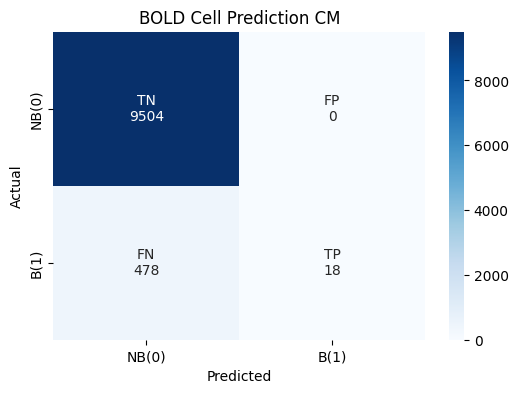


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,2,3,5,9
0,1,0,0,0,0
2,1,0,0,0,0
6,0,1,0,0,0
7,0,1,0,1,0
8,1,0,0,0,1
9,1,1,1,1,0
10,1,0,0,0,1
11,1,0,0,0,0
12,1,0,0,0,0
15,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,2,3,5,6,9,11,12,14,15
0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,1,0,0,0
7,0,1,0,1,0,0,1,0,1,0
8,1,0,0,0,0,1,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1
11,1,0,0,0,0,1,0,0,0,0
12,1,1,1,1,1,1,1,1,1,1
13,1,0,0,0,0,1,0,0,0,0


In [12]:
test_loc = 1

# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=test_loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 267/267 [00:49<00:00,  5.44it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 7971823:28177 | Actual = 7975154:24846
Accuracy: 99.57% | Precision: 29.33% | Recall: 58.79% | F1-Score: 0.32



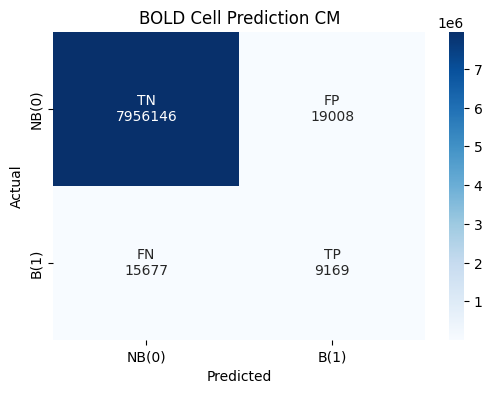

In [13]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 34/34 [00:06<00:00,  5.53it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 996743:3257 | Actual = 997147:2853
Accuracy: 99.61% | Precision: 30.66% | Recall: 50.99% | F1-Score: 0.29



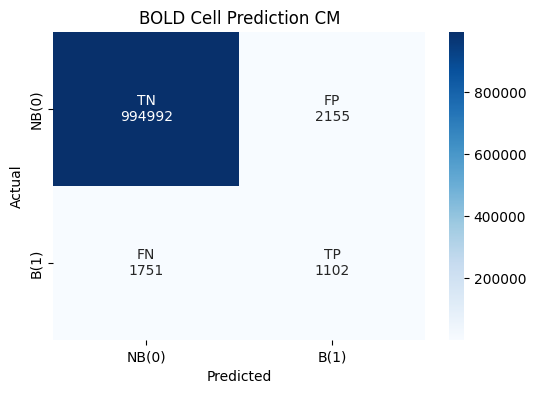

In [27]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 34/34 [00:06<00:00,  5.53it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 996512:3488 | Actual = 997320:2680
Accuracy: 99.62% | Precision: 30.44% | Recall: 58.39% | F1-Score: 0.34



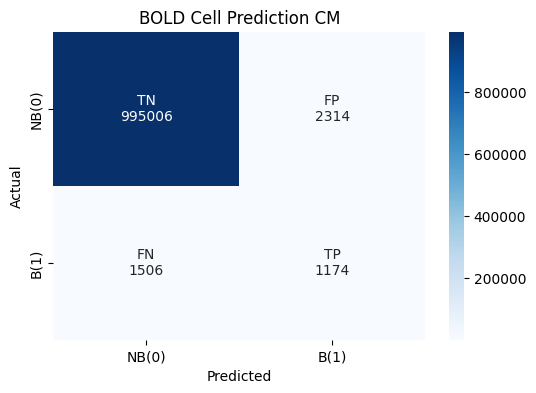

In [15]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)